In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package ( in lpa )')

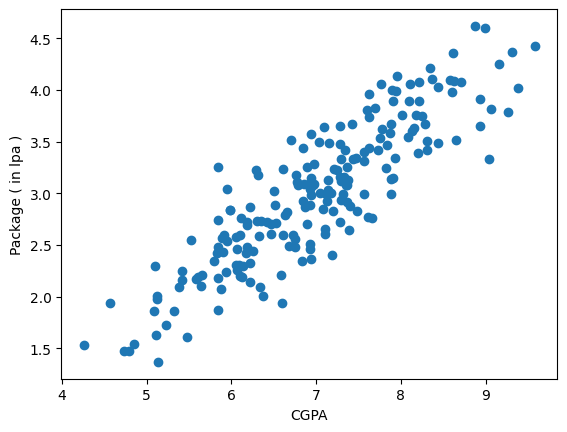

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel("Package ( in lpa )")

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [9]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package in LPA')

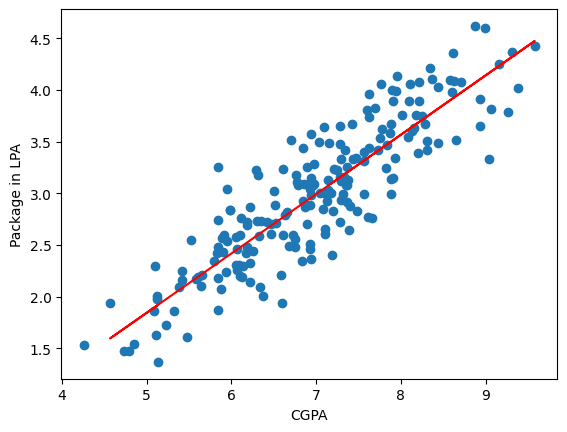

In [13]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel("CGPA")
plt.ylabel('Package in LPA')

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
y_pred = lr.predict(X_test)

In [18]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [19]:
print("MAE: ", mean_absolute_error(y_test, y_pred))

MAE:  0.23150985393278373


In [20]:
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  0.08417638361329656


In [22]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  0.2901316659954521


In [25]:
print("R2 Score: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score:  0.7730984312051673


In [26]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [27]:
1 - ((1-r2)*(40 -1)) / (40 - 1 - 1)

0.7671273372895138

In [28]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa', 'random_feature', 'package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.182777,3.26
1,5.12,0.994717,1.98
2,7.82,0.756629,3.25
3,7.42,0.965695,3.67
4,6.94,0.904544,3.57


In [29]:
new_df.shape

(200, 3)

In [30]:
new_df.values

array([[6.89000000e+00, 1.82776595e-01, 3.26000000e+00],
       [5.12000000e+00, 9.94716633e-01, 1.98000000e+00],
       [7.82000000e+00, 7.56629369e-01, 3.25000000e+00],
       [7.42000000e+00, 9.65695196e-01, 3.67000000e+00],
       [6.94000000e+00, 9.04544238e-01, 3.57000000e+00],
       [7.89000000e+00, 6.89750918e-01, 2.99000000e+00],
       [6.73000000e+00, 4.07973318e-01, 2.60000000e+00],
       [6.75000000e+00, 9.42175031e-01, 2.48000000e+00],
       [6.09000000e+00, 4.39210568e-01, 2.31000000e+00],
       [8.31000000e+00, 4.55607995e-01, 3.51000000e+00],
       [5.32000000e+00, 4.60227852e-02, 1.86000000e+00],
       [6.61000000e+00, 3.93877004e-01, 2.60000000e+00],
       [8.94000000e+00, 3.80047850e-03, 3.65000000e+00],
       [6.93000000e+00, 4.81840535e-01, 2.89000000e+00],
       [7.73000000e+00, 6.70830348e-01, 3.42000000e+00],
       [7.25000000e+00, 3.11078804e-01, 3.23000000e+00],
       [6.84000000e+00, 7.68715040e-01, 2.35000000e+00],
       [5.38000000e+00, 7.34333

Text(0, 0.5, 'package')

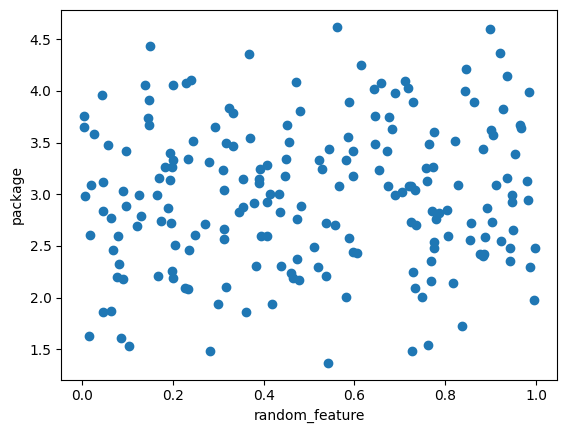

In [33]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [34]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [36]:
X.head()

,cgpa,random_feature
0,6.89,0.182777
1,5.12,0.994717
2,7.82,0.756629
3,7.42,0.965695
4,6.94,0.904544


In [37]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
print('R2 score: ', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score:  0.7604346494360367


In [43]:
1 - ((1-r2)*(40 -1)) / (40 - 1 - 1)

0.7541302981054061

In [44]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [45]:
new_df2.head()

,cgpa,iq,package
0,6.89,2.96,3.26
1,5.12,1.18,1.98
2,7.82,3.55,3.25
3,7.42,2.47,3.67
4,6.94,3.77,3.57


Text(0, 0.5, 'package')

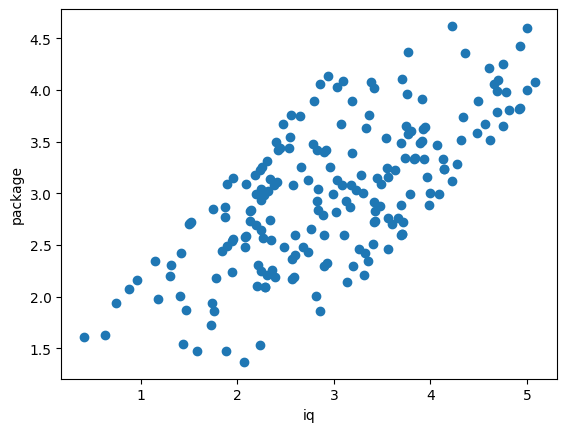

In [46]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [47]:
np.random.randint(-100, 100)

74

In [48]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [49]:
X.head()

,cgpa,iq
0,6.89,2.96
1,5.12,1.18
2,7.82,3.55
3,7.42,2.47
4,6.94,3.77


In [50]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [51]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [54]:
print('R2 score: ', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score:  0.8356497326018024


In [55]:
1 - ((1-r2)*(40 -1)) / (40 - 1 - 1)

0.8313247255650078